# Домашнее задание 2

По данным https://www.openml.org/d/35 вам предстоит научиться предсказывать одно из 6 заболеваний

# План
1. Проанализируйте данные. Обработайте все пропуски, nan'ы и inf'ы
2. Визуализируйте данные с помощью PCA и (или) t-SNE
3. Обучите различные линейные модели (Logistic Regression, SVM). Подберите наилучшие параметры и добейтесь наилучшей доли правильных ответов на предсказаниях
4. Визуализируйте предсказания модели, как на семинаре 2. Справляется ли этот класс классификаторов с данной задачей, или нужны другие методы (KNN?)

In [29]:
import pandas as pd

In [44]:
df = pd.read_csv('dataset_35_dermatology.csv')
df.head()
df.shape

(366, 35)

In [31]:
# 1. Проанализируйте данные. Обработайте все пропуски, nan'ы и inf'ы
{i: set(df[i]) for i in df}

{'Age': {'0',
  '10',
  '12',
  '13',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '55',
  '56',
  '57',
  '58',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '67',
  '68',
  '7',
  '70',
  '75',
  '8',
  '9',
  '?'},
 'PNL_infiltrate': {0, 1, 2, 3},
 'acanthosis': {0, 1, 2, 3},
 'band-like_infiltrate': {0, 1, 2, 3},
 'class': {1, 2, 3, 4, 5, 6},
 'clubbing_of_the_rete_ridges': {0, 1, 2, 3},
 'definite_borders': {0, 1, 2, 3},
 'disappearance_of_the_granular_layer': {0, 1, 2, 3},
 'elongation_of_the_rete_ridges': {0, 1, 2, 3},
 'eosinophils_in_the_infiltrate': {0, 1, 2},
 'erythema': {0, 1, 2, 3},
 'exocytosis': {0, 1, 2, 3},
 'family_history': {0, 1},
 'fibrosis_of_the_papillary_dermis': {0, 1, 2, 3},
 'focal_hypergra

In [32]:
df['Age'].value_counts()

40    17
50    17
27    16
36    16
22    15
55    14
35    14
25    14
30    13
33    12
52    11
60    11
42    10
18     9
20     8
34     8
?      8
10     7
62     7
51     7
45     7
8      7
19     6
47     6
32     6
46     6
48     5
28     5
56     5
17     5
      ..
44     5
70     4
43     4
41     4
7      4
23     3
29     3
26     3
38     3
12     3
21     3
39     2
13     2
57     2
9      2
61     2
53     2
31     2
65     2
37     2
15     2
24     2
67     1
64     1
75     1
58     1
63     1
0      1
49     1
68     1
Name: Age, Length: 61, dtype: int64

In [33]:
# В приложенном csv пропусков и нанов не обнаружено. Есть только в поле AGE 8 значений "?".
# Заменяю на медиану и приобразовываю в строку. Потом буду ванхотинкодить, так как это поле единственное object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite_borders                            366 non-null int64
itching                                     366 non-null int64
koebner_phenomenon                          366 non-null int64
polygonal_papules                           366 non-null int64
follicular_papules                          366 non-null int64
oral_mucosal_involvement                    366 non-null int64
knee_and_elbow_involvement                  366 non-null int64
scalp_involvement                           366 non-null int64
family_history                              366 non-null int64
melanin_incontinence                        366 non-null int64
eosinophils_in_the_infiltrate               366 non-null int64
PNL_infiltrate                              366 non-null int64
fibrosis_of_t

In [57]:
df.replace(to_replace='?', value='NaN', inplace=True)
vals = [int(i) for i in df['Age'] if i != 'NaN']
df['Age'].value_counts()
mean = sum(vals)/len(vals)
mean = int(mean)
mean

36

In [60]:
df.replace(to_replace='NaN', value=str(mean), inplace=True)

In [61]:
df['Age'].value_counts()

36    24
40    17
50    17
27    16
22    15
55    14
25    14
35    14
30    13
33    12
52    11
60    11
42    10
18     9
20     8
34     8
8      7
62     7
45     7
51     7
10     7
19     6
46     6
47     6
32     6
56     5
16     5
48     5
28     5
17     5
44     5
7      4
70     4
43     4
41     4
29     3
38     3
23     3
12     3
26     3
21     3
31     2
57     2
9      2
53     2
13     2
65     2
37     2
15     2
24     2
39     2
61     2
49     1
58     1
67     1
0      1
63     1
64     1
75     1
68     1
Name: Age, dtype: int64

In [64]:
set([type(i) for i in df['Age']])

{str}

In [71]:
df = df.astype({"Age": int})

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite_borders                            366 non-null int64
itching                                     366 non-null int64
koebner_phenomenon                          366 non-null int64
polygonal_papules                           366 non-null int64
follicular_papules                          366 non-null int64
oral_mucosal_involvement                    366 non-null int64
knee_and_elbow_involvement                  366 non-null int64
scalp_involvement                           366 non-null int64
family_history                              366 non-null int64
melanin_incontinence                        366 non-null int64
eosinophils_in_the_infiltrate               366 non-null int64
PNL_infiltrate                              366 non-null int64
fibrosis_of_t

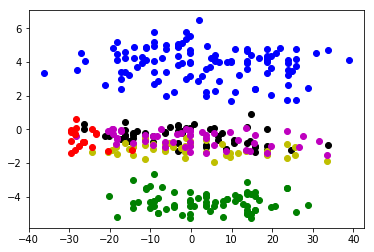

In [109]:
# Визуализируйте данные с помощью PCA и (или) t-SNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = df
y = df['class']

pca = PCA(n_components=6)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'bo')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ko')
plt.plot(X_pca[y == 3, 0], X_pca[y == 3, 1], 'go')
plt.plot(X_pca[y == 4, 0], X_pca[y == 4, 1], 'yo')
plt.plot(X_pca[y == 5, 0], X_pca[y == 5, 1], 'mo')
plt.plot(X_pca[y == 6, 0], X_pca[y == 6, 1], 'ro')
plt.show()

In [111]:
# Обучите различные линейные модели (Logistic Regression, SVM). 
# Подберите наилучшие параметры и добейтесь наилучшей доли правильных ответов на предсказаниях
from sklearn.model_selection import train_test_split

target_col = 'class'
X, y = df.drop(target_col, 1), df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [126]:
from sklearn.linear_model import LogisticRegression
import numpy as np
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
tol = [0.0001, 0.0005, 0.001]  
C = [1.0, 0.5, 0.1, 0.05, 0.01]
random_state = [10, 50, 100, 1000]
best_res = {'score': 0, 'args': [None]}

for s in solver:
    for t in tol:
        for c in C:
            for r in random_state:
                clf = LogisticRegression(solver=s, tol=t, C=c, random_state=r).fit(X, y)
                model_result = clf.score(X, y)
                if model_result > best_res['score']:
                    best_res['score'] = model_result
                    best_res['args'] = [s, t, c, r]
                
best_res

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'args': ['newton-cg', 0.0001, 1.0, 10], 'score': 0.9918032786885246}

In [127]:
# Меня смущает 'score': 0.9918032786885246. Похоже в данных есть какая-то утечка.

In [130]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)
clf.score(X, y, sample_weight=None)

0.9918032786885246